# PRCP-1006-HomeLoanDef 


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape


(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

In [7]:
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)

missing.head(10)


COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
dtype: float64

In [8]:
df['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

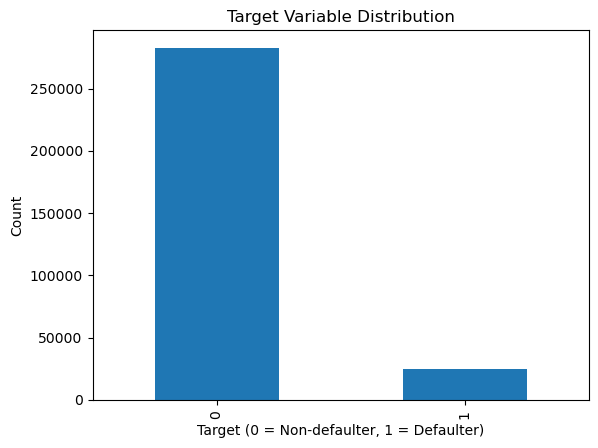

In [9]:


df['TARGET'].value_counts().plot(kind='bar')
plt.xlabel("Target (0 = Non-defaulter, 1 = Defaulter)")
plt.ylabel("Count")
plt.title("Target Variable Distribution")
plt.show()


In [10]:
# Calculate missing percentage
missing = df.isnull().mean() * 100

# Drop columns with more than 60% missing values
cols_to_drop = missing[missing > 60].index

df.drop(columns=cols_to_drop, inplace=True)
print("Dropped columns count:", len(cols_to_drop))


Dropped columns count: 17


In [11]:
df.isnull().sum().sort_values(ascending=False).head(10)


LANDAREA_AVG          182590
LANDAREA_MODE         182590
LANDAREA_MEDI         182590
BASEMENTAREA_AVG      179943
BASEMENTAREA_MODE     179943
BASEMENTAREA_MEDI     179943
EXT_SOURCE_1          173378
NONLIVINGAREA_AVG     169682
NONLIVINGAREA_MODE    169682
NONLIVINGAREA_MEDI    169682
dtype: int64

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [13]:
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
    
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



In [14]:
df.isnull().sum().sum()


np.int64(0)

# Univariate Exploratory Data Analysis (EDA)

In [15]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols



Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'EN

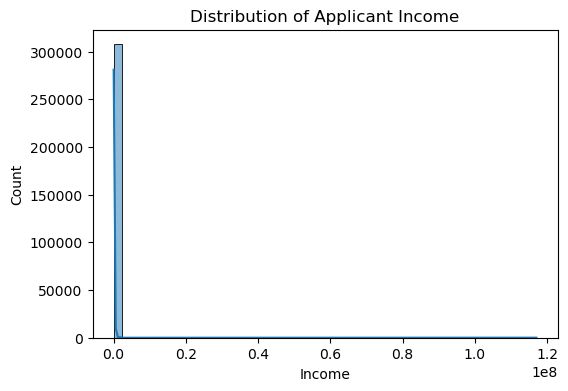

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title("Distribution of Applicant Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


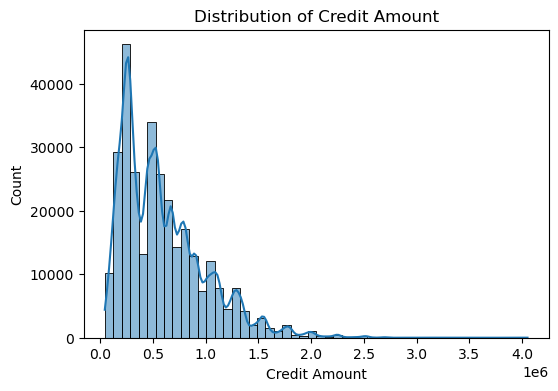

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['AMT_CREDIT'], bins=50, kde=True)
plt.title("Distribution of Credit Amount")
plt.xlabel("Credit Amount")
plt.ylabel("Count")
plt.show()


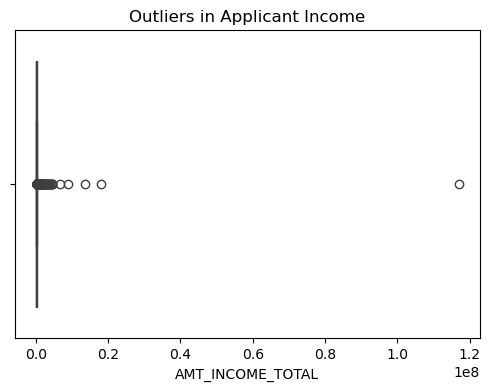

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['AMT_INCOME_TOTAL'])
plt.title("Outliers in Applicant Income")
plt.show()



In [19]:
# now we Identify Categorical Columns 

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

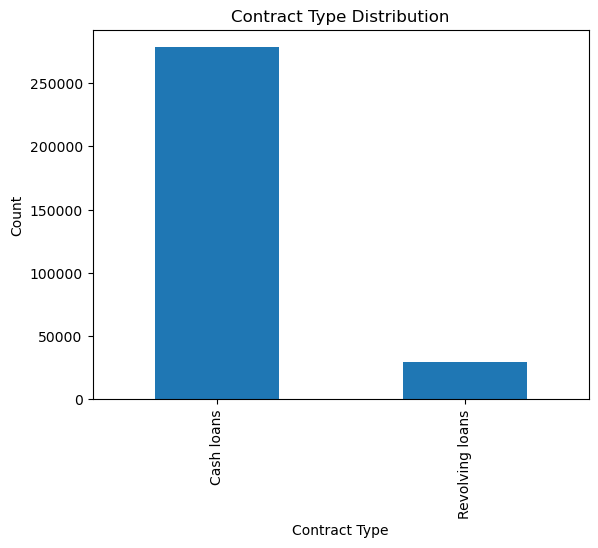

In [21]:
df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


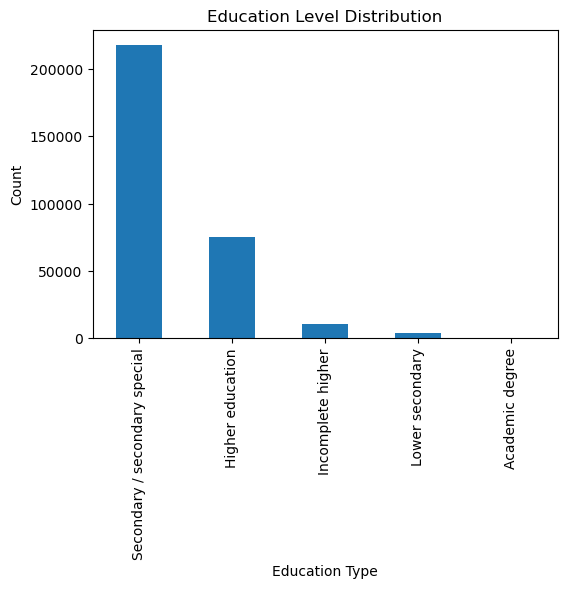

In [22]:
df['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Education Level Distribution")
plt.xlabel("Education Type")
plt.ylabel("Count")
plt.show()


In [23]:
df['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

In [24]:

df['TARGET'].value_counts(normalize=True) * 100


TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

 # Numerical Feature vs TARGET

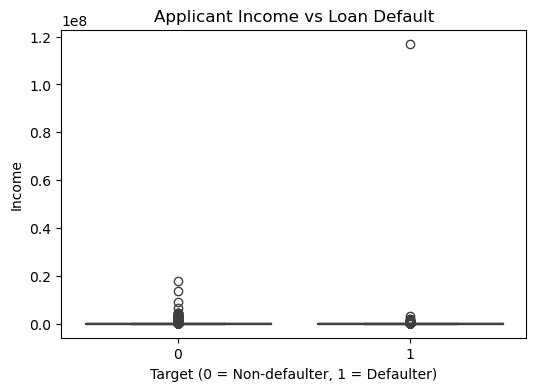

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.title("Applicant Income vs Loan Default")
plt.xlabel("Target (0 = Non-defaulter, 1 = Defaulter)")
plt.ylabel("Income")
plt.show()


In [26]:
# Observation:
# Applicants who default tend to have slightly lower income compared
# to non-defaulters. Lower income appears to be associated with higher
# default risk.


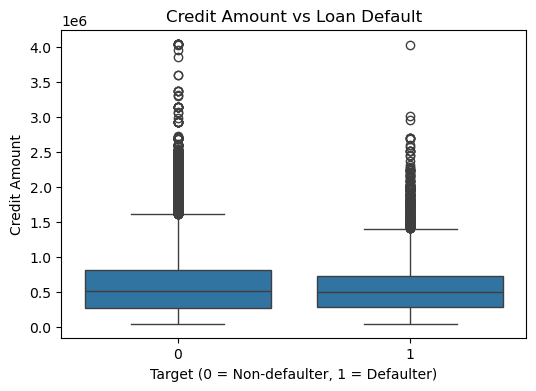

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df)
plt.title("Credit Amount vs Loan Default")
plt.xlabel("Target (0 = Non-defaulter, 1 = Defaulter)")
plt.ylabel("Credit Amount")
plt.show()


In [28]:
# Observation:
# Defaulters generally have slightly lower or similar credit amounts
# compared to non-defaulters. Credit amount alone may not strongly
# differentiate defaulters.


# Categorical Feature vs TARGET

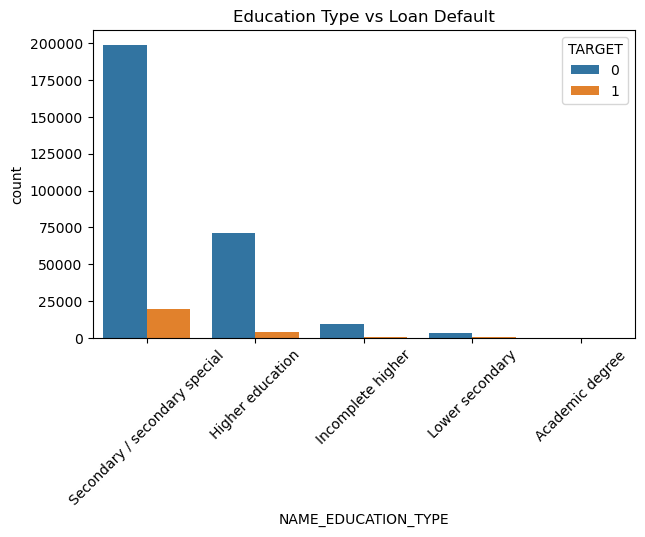

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df)
plt.xticks(rotation=45)
plt.title("Education Type vs Loan Default")
plt.show()


In [30]:
# Observation:
# Applicants with lower education levels show a higher proportion of defaults,
# while applicants with higher education tend to default less.


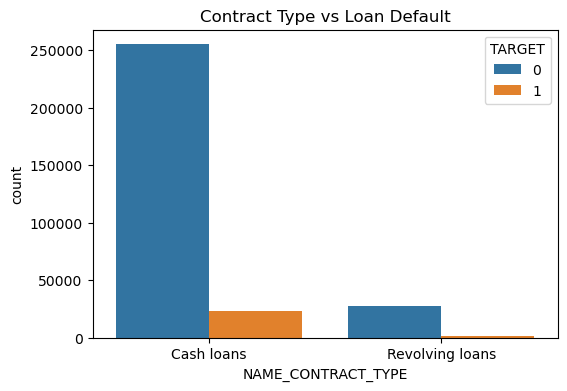

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df)
plt.title("Contract Type vs Loan Default")
plt.show()


In [32]:
# Observation:
# Cash loans have a higher number of defaulters compared to revolving loans.
# Contract type appears to influence default behavior.


In [33]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']


In [34]:
cat_cols = X.select_dtypes(include=['object']).columns
cat_cols


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])


In [36]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


## Classification Models

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
y_test

256571    0
191493    0
103497    0
130646    0
211898    0
         ..
16213     0
294620    0
234384    0
149027    1
268861    0
Name: TARGET, Length: 61503, dtype: int64

In [73]:
Log_Reg_a_s = accuracy_score(y_test, y_pred)
Log_Reg_a_s

0.8496821293270247

In [74]:
Log_Reg_c_m= confusion_matrix(y_test, y_pred)
Log_Reg_c_m

array([[51408,  5130],
       [ 4115,   850]])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.53      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.72      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



In [75]:
Log_Reg_r_a_s = roc_auc_score(y_test, y_pred)
Log_Reg_r_a_s

np.float64(0.5402314770730355)

## DecisionTree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier


In [65]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
y_pred = dtree.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
y_test

256571    0
191493    0
103497    0
130646    0
211898    0
         ..
16213     0
294620    0
234384    0
149027    1
268861    0
Name: TARGET, Length: 61503, dtype: int64

In [76]:
dt_a_s =accuracy_score(y_test, y_pred)
dt_a_s

0.8496821293270247

In [77]:
dt_c_m= confusion_matrix(y_test, y_pred)
dt_c_m

array([[51408,  5130],
       [ 4115,   850]])

In [79]:
dt_c_r = classification_report(y_test, y_pred)
print(dt_c_r)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     56538
           1       0.14      0.17      0.16      4965

    accuracy                           0.85     61503
   macro avg       0.53      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503

